# Project Foundations for Data Science: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


**Observations:**

* The DataFrame has 9 columns/attributes. 
* Data in each row corresponds to the order placed by a customer.
* The order_id column holds numerical data showing the order of the foods
* The customer_id column contains the id for each customer entry
* The restaurant_name contains the names of the restaurants while cuisine_type tells us the type of cuisine they serve
* The cost_of_the_order holds float data types showing the cost of the orders
* food_preparation_time contains numerical values showing the time it takes to make the meals
* delivery_time is a numerical variable showing the time it took to deliver the order



### **Question 1:** How many rows and columns are present in the data?

In [5]:
df.shape

(1898, 9)

#### Observations:


There are 1898 rows and 9 columns present in the dataset

### **Question 2:** What are the datatypes of the different columns in the dataset?

In [12]:
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

**Observations:**


As we said earlier, there are 9 columns and there are 4 integer datatypes, 4 object datatypes and one float datatype

Below is a list of the datatypes of the different columns:

1. order_id is integer
2. customer_id is integer
3. restaurant_name is of object type
4. cuisine_type is also object
5. cost_of_the_order is float
6. day_of_the_week is object type
7. rating is object type
8. food_preparation_time is integer
9. delivery_time is integer


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


There are no missing values in any of the columns. The columns each has 1898 entries of values

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [4]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


**Observations:**


1. The minimum time it takes to prepare food once the order is placed is 20mins
2. The maximum time is 35 mins and 
3. the average time is 27 mins
4. The values of the mean and median suggests a relatively balanced distribution without significant skewness and the data is evenly spread around the central tendency. 

In [5]:
df.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


**Observations**

* There are a total of 178 restaurants in the dataset. 
* Shake Shack has the highest numbers of the orders made with 219 orders in total.
* There are 14 different types of cuisines with American cuisine having the highest number of orders.
* Most of the orders were made over the weekend with a total of 1351 orders.


In [6]:
# Making a list of all categorical variables 
cat_col = ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    
    print('-' * 50)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64
--------------------------------------------------
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64
--------------------------------------------------
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64
--------------------------------------------------
Not given    736
5        

**Observation:**

* This just buttresses some of what we have seen earlier:
* The Shake Shack restaurant served almost double what the restaurant after it served.
* The Vietnamese cuisine was ordered just 7 times
* There are quite a number of restaurants that served just a meal in this period.

### **Question 5:** How many orders are not rated? 

In [28]:
df2 = df["rating"].value_counts()
df2

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

**Observations:**


The above result shows that there are 736 instances when orders were not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) 

**Let us explore the numerical variables first.**

In [8]:
def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

### **Observations on Cost of Order**

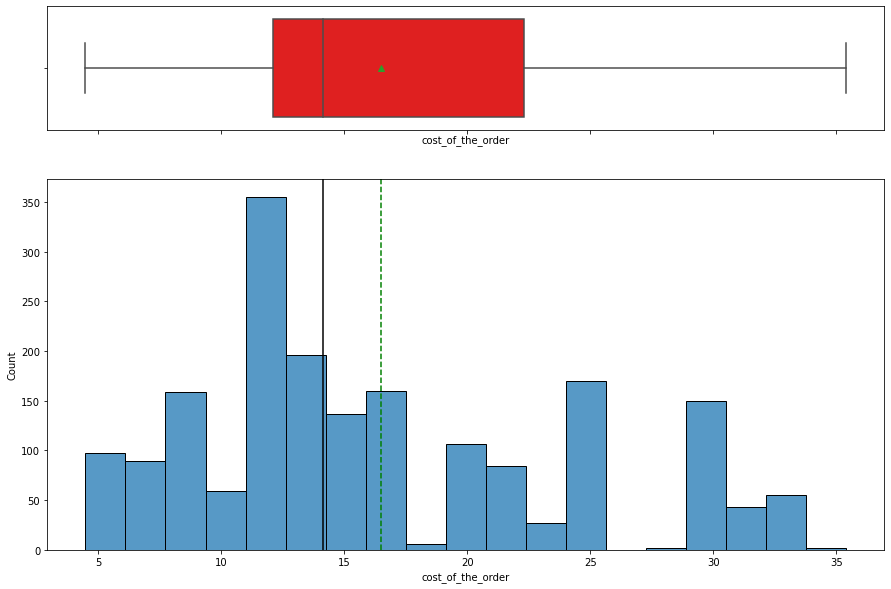

In [9]:
histogram_boxplot(df.cost_of_the_order)

**Observations:**

* The distribution of the data with regards to the cost of the orders is heavily skewed towards the lower values (i.e. heavily right-skewed). 
* Half of the costs of the orders are below 15 dollars while the higher costs have relatively fewer orders.
* Median cost is around 14 dollars, but the mean cost is around 16 dollars.
* There are no presence of outliers in this variable.
* The cost with the highest number of orders is somewhere between 11 and 12 dollars and has almost 350 orders 

### **Observations on Order Delivery Time**

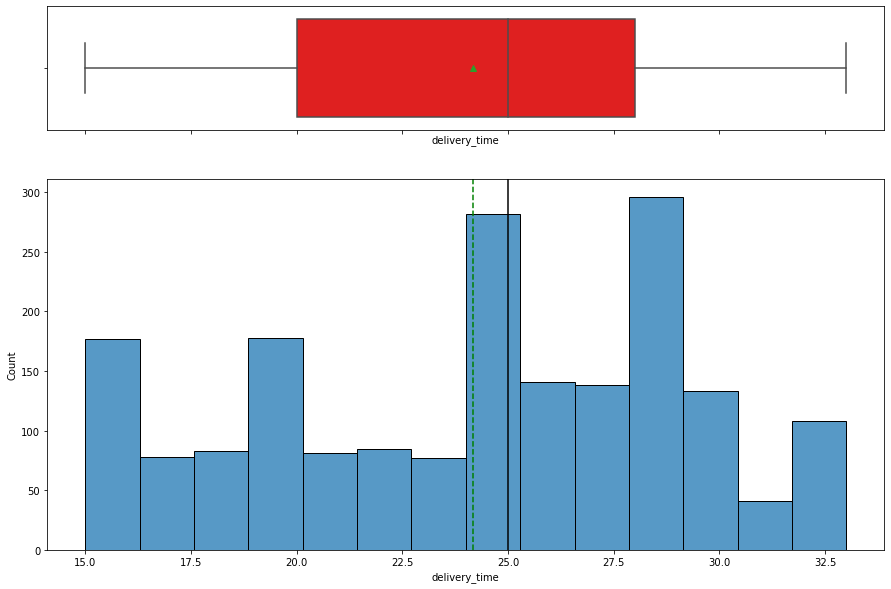

In [10]:
histogram_boxplot(df.delivery_time)

**Observations:**

* No order was delivered below 15 mins and none was delivered above 33 mins
* The average delivery time is around 24 mins
* 50 percent of the delivery was done below 25 mins
* This is a bimodal graph showing that most of the orders were delivered between 24 to 25 mins and 28 to 29 mins. 

### **Observations on Food Preparation Time**

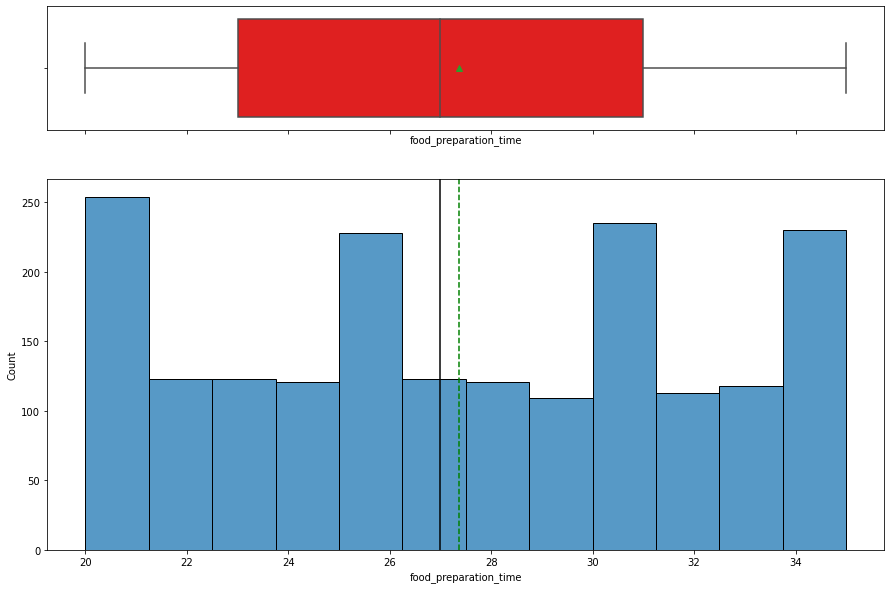

In [11]:
histogram_boxplot(df.food_preparation_time)

**Observations:**

* The distribution of food preparation time fairly symmetrical with the Q1 and Q3 being almost equidistant to the meadian.
* We observe that the dataset is multi-modal with order peaks at 4 different time intervals: 20-21 mins, 25-26 mins, 30-31 mins and 34-35 mins

**Now, let's explore the categorical variables.**

In [106]:
def labeled_barplot(data, feature, perc = False, n=None):
    """
    Barplot with percentages at the top
    
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    
    total = len(data[feature])   # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))
    
    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )
    
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                         # Percentage of each class of the category
        else:
            label = p.get_height()   # count of each level of the category
            
        x = p.get_x() + p.get_width() / 2    #width of the plot
        y = p.get_height()
        
        ax.annotate(
        label,
        (x, y),
        ha = "center",
        va = "center",
        size = 12,
        xytext = (0, 5),
        textcoords = "offset points",
        )       # Annotate the percentage
        
        
    plt.show()   # Show the plot

### **Observations on Cuisine Type**

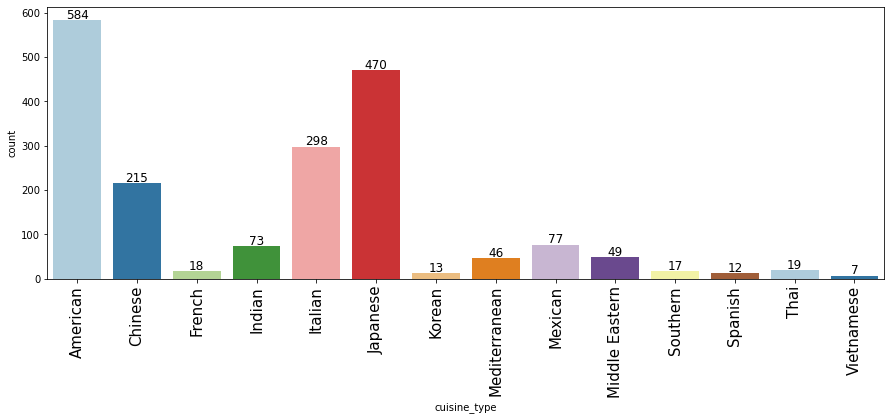

In [82]:
labeled_barplot(df, 'cuisine_type')

**Observation:**

* There are 14 cuisine types
* American cuisine was ordered the most with 548 orders.
* The American, Japanese cuisine, Italian cuisine and Chinese cuisine served 1,567 orders out of the 1,898 orders. 
* The four cuisine types above accounted for 82.53% of all orders

### **Observations on Ratings**

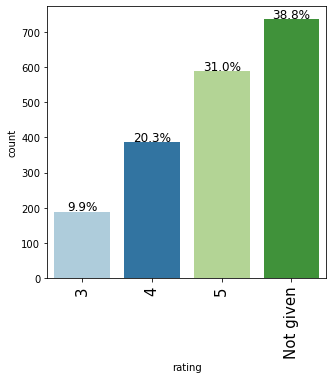

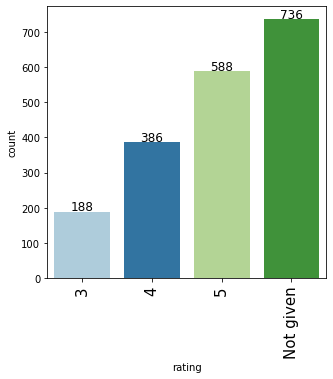

In [88]:
labeled_barplot(df, 'rating', perc = True)

labeled_barplot(df, 'rating')

**Observation:**

* 38.8% (that's 736 orders) of the total orders (1898 orders) were not rated 
* 31% (588) of the orders delivered were given a rating of 5
* 20.3% (386) of the orders delivered were given a rating of 4
* 9.9% (188) of the orders delivered were given a rating of 3

### **Observations on Restaurants**

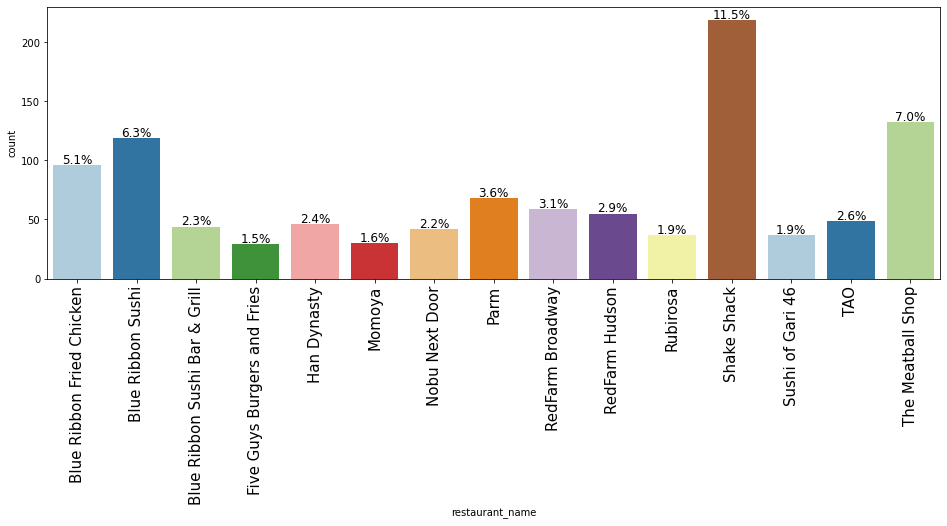

In [91]:
labeled_barplot(df, 'restaurant_name', perc = True, n=15)

**Observations:**

* The plot above shows the top 15 restaurants that received the heighest number of orders
* 11.5% of all orders were received by Shake Shack
* The Meatball Shop is second receiving 7% of all orders


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [44]:
count = df['restaurant_name'].value_counts()
print(count)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64


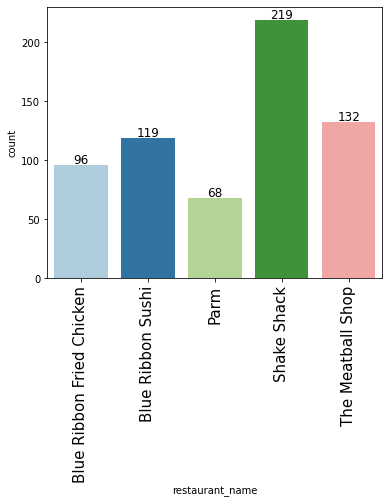

In [105]:
labeled_barplot(df, 'restaurant_name', n=5)

#### Observations:


The top 5 restaurants in terms of orders received are:
1. Shake Shack   -                219
2. The Meatball Shop     -        132
3. Blue Ribbon Sushi     -        119
4. Blue Ribbon Fried Chicken -     96
5. Parm                     -      68

### **Question 8**: Which is the most popular cuisine on weekends? 

In [104]:
df.query("day_of_the_week=='Weekend'")["cuisine_type"].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

**Observations:**


* From the result about, the most popular cusine on weekends is American cuisine with 415 orders

### **Question 9**: What percentage of the orders cost more than 20 dollars? 

In [98]:
((df.cost_of_the_order)>20).value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

False    70.8%
True     29.2%
Name: cost_of_the_order, dtype: object

**Observation:**

* 29.2% of the orders cost over 20 dollars

### **Question 10**: What is the mean order delivery time? 

In [71]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:


The mean order delivery time is 24.16 minutes 

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. 

In [93]:
df['customer_id'].nunique()

1200

* There are 1200 customers in this database

### The top 3 most frequent customers and the number of orders they placed.

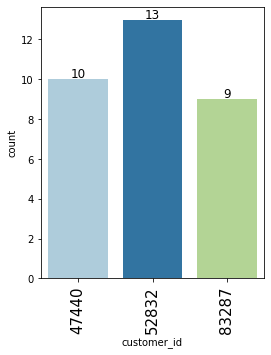

In [99]:
labeled_barplot(df, 'customer_id', n=3)

**Observations:**


These are the most frequent customers with the number of orders they made:

* The most frequent customer in the database is the customer with id 52832 (who has 13 orders)
* Following behind is the customer with id 47440 (with 10 orders)
* Lastly the customer with id 83287 (9 orders)

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

### **Let's start by checking for correlation between the numerical features**

<AxesSubplot:>

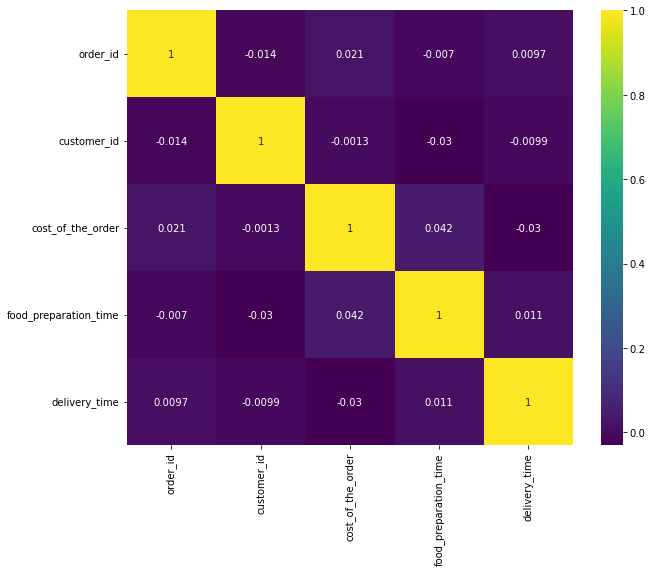

In [201]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

**Observations:**

* The heatmap strongly shows no correlation between the variables

### **Effect of categorical features with respect to numerical features**

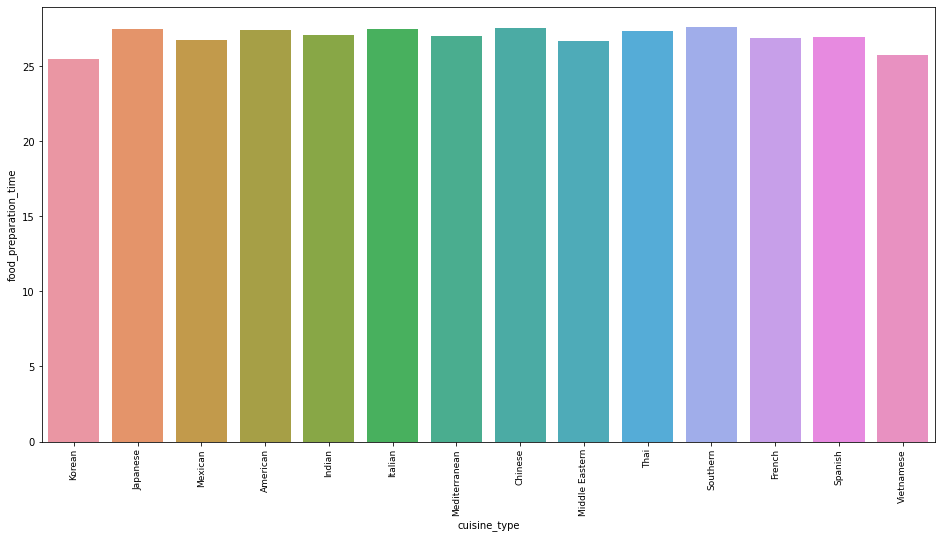

In [151]:
plt.figure(figsize = (16, 8))
sns.barplot(data = df, x = 'cuisine_type', y = 'food_preparation_time', ci = None,)
plt.xticks(rotation = 90, size = 9);

**Observation:**

* There's no significant difference in the time of preparation of the orders for different cuisine types.

In [150]:
order = df.groupby(['cuisine_type'])['food_preparation_time'].mean().sort_values(ascending = False).index;
order

Index(['Southern', 'Chinese', 'Japanese', 'Italian', 'American', 'Thai',
       'Indian', 'Mediterranean', 'Spanish', 'French', 'Mexican',
       'Middle Eastern', 'Vietnamese', 'Korean'],
      dtype='object', name='cuisine_type')

**Observation:**

* We see however that the Southern, Chinese, Italian and American cuisines in that order take longer on the average than other cuisine types

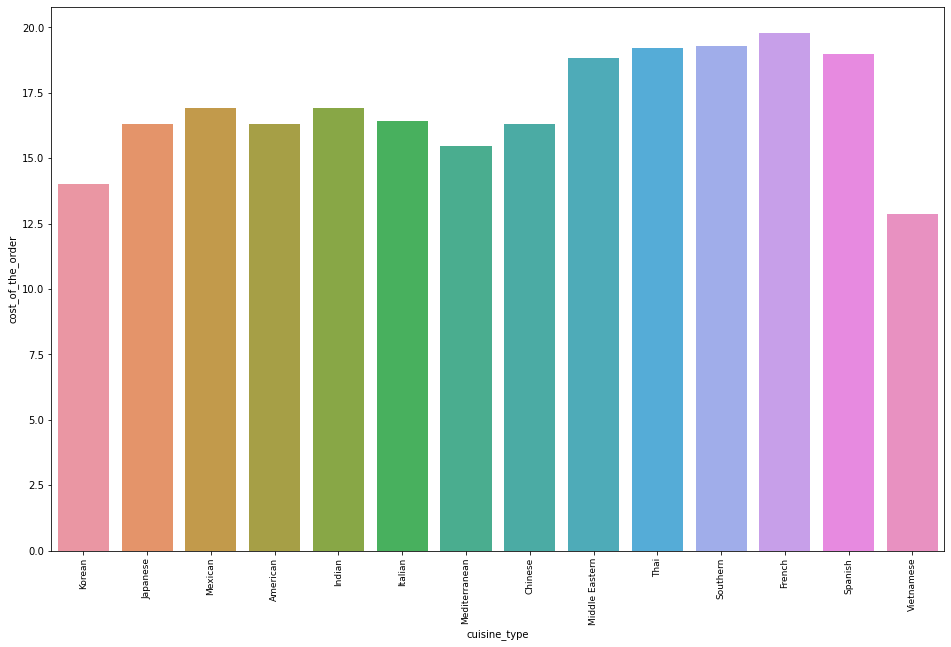

In [161]:
plt.figure(figsize = (16, 10))
sns.barplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order', ci = None,)
plt.xticks(rotation = 90, size = 9);

In [200]:
order = df.groupby(['cuisine_type'])['cost_of_the_order'].mean().sort_values(ascending = False).index;
order

Index(['French', 'Southern', 'Thai', 'Spanish', 'Middle Eastern', 'Mexican',
       'Indian', 'Italian', 'American', 'Chinese', 'Japanese', 'Mediterranean',
       'Korean', 'Vietnamese'],
      dtype='object', name='cuisine_type')

**Observation:**

* There is a significant difference in the cost of the orders from different cuisine types. 
* The Korean and Vietnamese meals seem to cost less than the others
* French, Southern, Thai, Spanish and Middle Eastern cuisines types cost more

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


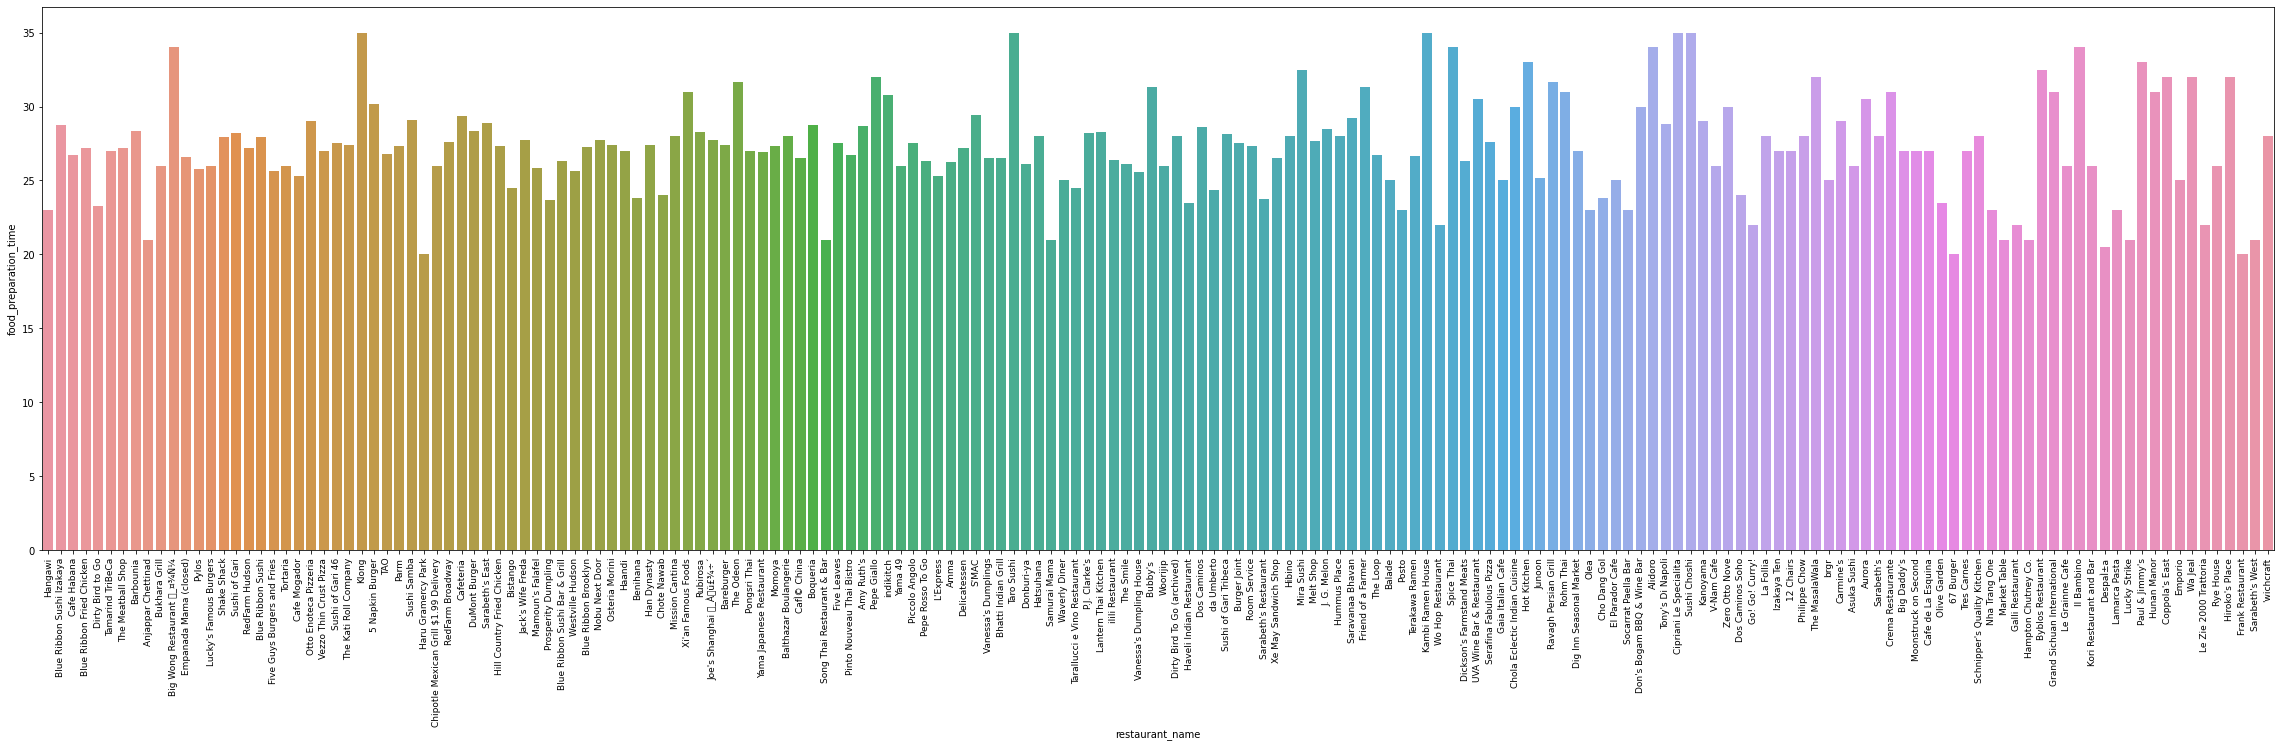

In [182]:
plt.figure(figsize = (40, 10))
sns.barplot(data = df, x = 'restaurant_name', y = 'food_preparation_time', ci = None,)
plt.xticks(rotation = 90, size = 9);

In [279]:
df.query("cuisine_type=='American'")["restaurant_name"].value_counts()

Shake Shack                    219
Blue Ribbon Fried Chicken       96
Five Guys Burgers and Fries     29
Bareburger                      27
The Meatball Shop               20
The Smile                       18
J. G. Melon                     15
Westville Hudson                15
P.J. Clarke's                   15
Burger Joint                    12
S'MAC                           12
Melt Shop                       11
Cafeteria                        9
Waverly Diner                    7
Sarabeth's East                  7
Sarabeth's Restaurant            7
Lucky's Famous Burgers           6
5 Napkin Burger                  5
Delicatessen                     5
Five Leaves                      4
Dirty Bird to Go                 4
Blue Ribbon Brooklyn             4
Friend of a Farmer               3
Dickson's Farmstand Meats        3
Sarabeth's                       3
Schnipper's Quality Kitchen      3
Bubby's                          3
Dirty Bird To Go (archived)      3
The Odeon           

**Observation:**

* There are 41 restaurants that serve American cuisine

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [270]:
# Firstly, let's select all the restaurants that have a ranting above 4

df2 = df.loc[df[df['rating'] == '5']['restaurant_name'].index, ['restaurant_name', 'rating']]
df2

,restaurant_name,rating
2,Cafe Habana,5
8,Anjappar Chettinad,5
9,Bukhara Grill,5
11,Empanada Mama (closed),5
12,Blue Ribbon Fried Chicken,5
...,...,...
1888,The Meatball Shop,5
1890,TAO,5
1893,Chipotle Mexican Grill $1.99 Delivery,5
1894,The Smile,5


In [275]:
# Now, let's find out the number of ratings each restaurant got.


rating_count = df2['restaurant_name'].value_counts()
filtered_data = rating_count[rating_count > 50]
filtered_data

Shake Shack          60
The Meatball Shop    53
Name: restaurant_name, dtype: int64

#### Observations:


* There are only 2 restaurants that criteria to get the promotional offer. They are:
1. Shake Shack with 60 ratings 
2. The Meatball Shop with 53

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

**1. Let's check if there are restaurants where the cost of the order was below 5 dollars**

In [285]:
# Checking if there are restaurants where the cost of the food was below 5 dollars


df.query("cost_of_the_order<=5.00")["restaurant_name"].value_counts()

Shake Shack                      2
Blue Ribbon Sushi Bar & Grill    2
Cafe Habana                      1
The Loop                         1
P.J. Clarke's                    1
Nobu Next Door                   1
RedFarm Hudson                   1
Name: restaurant_name, dtype: int64

In [349]:
# Below we display the dataframe of those restaurants and the orders below or equal to 5 dollars for a better look 


df3 = df.loc[df[df['cost_of_the_order'] <= 5.00]['restaurant_name'].index, [ 'order_id', 'restaurant_name','cost_of_the_order']]
df3

,order_id,restaurant_name,cost_of_the_order
82,1477790,Shake Shack,4.75
390,1477196,Cafe Habana,4.85
480,1476877,The Loop,4.66
542,1477788,P.J. Clarke's,4.71
624,1477349,Nobu Next Door,4.47
664,1476909,Blue Ribbon Sushi Bar & Grill,4.85
889,1477787,Shake Shack,4.80
1569,1477786,RedFarm Hudson,4.75
1695,1478302,Blue Ribbon Sushi Bar & Grill,4.90


### We find that 9 orders cost below 5 dollars. So since the commission the company charges the restaurants for those orders worth less than 5 dollars was not specified, we'll proceed to calculate the company's net revenue assuming that the same commission for 5 dollars applies to the 9

In [311]:
# Checking for the number of orders with cost greater than or equal to 20 dollars 

df4 = df.loc[df[df['cost_of_the_order'] >= 20.00]['restaurant_name'].index, ['restaurant_name','cost_of_the_order']]
df4

,restaurant_name,cost_of_the_order
0,Hangawi,30.75
3,Blue Ribbon Fried Chicken,29.20
5,Tamarind TriBeCa,25.22
12,Blue Ribbon Fried Chicken,24.30
17,Blue Ribbon Sushi Izakaya,33.03
...,...,...
1884,Shake Shack,31.43
1885,Shake Shack,29.05
1892,Han Dynasty,29.15
1893,Chipotle Mexican Grill $1.99 Delivery,22.31


In [323]:
total_cost_of_order1 = df4['cost_of_the_order'].sum()
total_cost_of_order1

14754.91

In [324]:
# Checking for the number of orders with cost less than 20 dollars

df5 = df.loc[df[df['cost_of_the_order'] < 20.00]['restaurant_name'].index, ['restaurant_name','cost_of_the_order']]
df5

,restaurant_name,cost_of_the_order
1,Blue Ribbon Sushi Izakaya,12.08
2,Cafe Habana,12.23
4,Dirty Bird to Go,11.59
6,The Meatball Shop,6.07
7,Barbounia,5.97
...,...,...
1890,TAO,15.67
1891,Shake Shack,5.82
1894,The Smile,12.18
1896,Jack's Wife Freda,12.18


In [325]:
total_cost_of_order2 = df5['cost_of_the_order'].sum()
total_cost_of_order2

16559.91

In [326]:
net_revenue =((total_cost_of_order1)*0.25) + ((total_cost_of_order2)*0.15)
net_revenue

6172.714

#### Observations:


* The total net revenue of the company is 6172.714 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [333]:
selected_columns = [ 'order_id', 'restaurant_name', 'food_preparation_time', 'delivery_time']
df6 = df[selected_columns].copy()
df6

,order_id,restaurant_name,food_preparation_time,delivery_time
0,1477147,Hangawi,25,20
1,1477685,Blue Ribbon Sushi Izakaya,25,23
2,1477070,Cafe Habana,23,28
3,1477334,Blue Ribbon Fried Chicken,25,15
4,1478249,Dirty Bird to Go,25,24
...,...,...,...,...
1893,1476701,Chipotle Mexican Grill $1.99 Delivery,31,17
1894,1477421,The Smile,31,19
1895,1477819,Blue Ribbon Sushi,31,24
1896,1477513,Jack's Wife Freda,23,31


In [345]:
# let's add a new column to my dataframe called total time that takes into account the total time it will take to deliver the food once an order has been placed.


df6['total_time'] = df['food_preparation_time'] + df['delivery_time']
df6

,order_id,restaurant_name,food_preparation_time,delivery_time,total_time
0,1477147,Hangawi,25,20,45
1,1477685,Blue Ribbon Sushi Izakaya,25,23,48
2,1477070,Cafe Habana,23,28,51
3,1477334,Blue Ribbon Fried Chicken,25,15,40
4,1478249,Dirty Bird to Go,25,24,49
...,...,...,...,...,...
1893,1476701,Chipotle Mexican Grill $1.99 Delivery,31,17,48
1894,1477421,The Smile,31,19,50
1895,1477819,Blue Ribbon Sushi,31,24,55
1896,1477513,Jack's Wife Freda,23,31,54


In [343]:
total_orders = len(df6)
over_60 = len(df6[df6['total_time'] > 60])
percentage = (over_60 / total_orders) * 100

percentage

10.537407797681771

**Observations:**

* From the above, we see that 10.5% orders took over 60 minutes to be delivered

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [346]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [348]:
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

mean_delivery_time

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:


* From the figures above, we see that delivery is relatively quicker on the weekends (5.8 minutes quicker on the weekends).  

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:


* A total of 178 restaurants were serviced in the period under review.
* Shake Shack restaurant serviced the highest number of orders than any other restaurant with 219 orders served in total.
* There are 14 different types of cuisines with American cuisine having the highest number of orders.
* The American cuisine type was ordered the most with 548 orders.
* The American, Japanese cuisine, Italian cuisine and Chinese cuisine served 1,567 orders out of the 1,898 orders. They accounted for 82.53% of all orders.
* Most of the food ordered were ordered over the weekend with a total of 1351 orders.
* A lot of the orders about 70.8% cost below 20 dollars. Only 29.2% of the orders cost over 20 dollars
* A total of 1200 customers were served
* The average time it took to prepare the food is 27 mins. About 50% of the meals took that time to be prepared.  
* The average delivery time is 24 mins even though delivery on the weekends is faster by almost 6 minutes when compared to the weekdays
* 10.5% of the orders took over 60 minutes to be delivered. That is approximately 200 orders.
* No order was delivered below 15 mins or above 33 mins.
* 50 percent of the deliveries were done below 25 mins
* 38.8% (that's 736 orders) of the total orders (1898 orders) were not rated

### Recommendations:

* The company needs to find a creative way to get customers to rate their service. There were over 700 instances in which the customers didn't provide feedback.
* The company should work on improved partnership with the restaurants that serve the American, Japanese, Italian and Chinese cuisine types.
* 

---